<a href="https://colab.research.google.com/github/sunshineluyao/finance/blob/main/code/NLP_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Set-up

In [57]:
pip install -U kaleido

In [58]:
pip install igviz

In [59]:
import pandas as pd
import numpy as np

In [60]:
import pandas as pd
import requests
import chardet

url = "https://raw.githubusercontent.com/sunshineluyao/finance/main/data/references.csv"
raw_data = requests.get(url).content
result = chardet.detect(raw_data)
encoding = result['encoding']

df = pd.read_csv(url, encoding=encoding)
df


Item type                                            Authors  \
0               Book                 Harvey CR,Ramachandran A,Santoro J   
1      Miscellaneous       Qin K,Zhou L,Afonin Y,Lazzaretti L,Gervais A   
2    Journal Article                                  Chod J,Lyandres E   
3    Journal Article                          Chung S,Kim K,Lee CH,Oh W   
4    Journal Article                                   Sockin M,Xiong W   
5    Journal Article           Chiu J,Davoodalhosseini SM,Jiang J,Zhu Y   
6    Journal Article  Barth A,Andreas J,Laturnus R,Mansouri S,Wagner AF   
7             Report                         Cong LW,Li X,Tang K,Yang Y   
8    Journal Article              Cong LW,Landsman W,Maydew E,Rabetti D   
9    Journal Article                         Davydiuk T,Gupta D,Rosen S   
10   Journal Article                           Hinzen FJ,John K,Saleh F   
11   Journal Article                           Divakaruni A,Zimmerman P   
12   Journal Article                               Chen X,Cheng Q,Luo T   
13   Journal Article  Biais B,Bisiere C,Bouvard M,Casamatta C,Menkve...   
14   Journal Article                                       Williamson S   
15   Journal Article                                Keister T,Sanches D   
16   Journal Article                                Cong LW,Li Y,Wang N   
17   Journal Article                     Lyandres E,Palazzo B,Rabetti D   
18   Journal Article     Bourveau T,De George ET,Ellahie A,Macciocchi D   
19   Journal Article                                  Chod J,Lyandres E   
20   Journal Article                                      Wei Y,Dukes A   
21   Journal Article                              Whitaker A,Kr√§ussl R   
22   Journal Article                     Howell ST,Niessner M,Yermack D   
23   Journal Article                                  Liu Y,Tsyvinski A   
24   Journal Article                                 Makarov I,Schoar A   
25   Journal Article                                 Griffin JM,Shams A   
26   Journal Article                                Chen MA,Wu Q,Yang B   
27   Journal Article                    Zetzsche DA,Arner DW,Buckley RP   
28  Conference Paper  Werner S,Perez D,Gudgeon L,Klages-Mundt A,Harz...   
29   Journal Article                     Goldstein I,Jiang W,Karolyi GA   
30   Journal Article              Hendershott T,Zhang X,Zhao JL,Zheng Z   
31  Conference Paper                 Bartoletti M,Chiang JH,Lafuente AL   
32   Journal Article                                           Katona T   

                                                Title  \
0                      DeFi and the Future of Finance   
1   CeFi vs. DeFi--Comparing Centralized to Decent...   
2   Product market competition with crypto tokens ...   
3   Interdependence between online peer-to-peer le...   
4                         A model of cryptocurrencies   
5   Bank market power and central bank digital cur...   
6      Conflicted analysts and initial coin offerings   
7                                 Crypto wash trading   
8           Tax-loss harvesting with cryptocurrencies   
9   De-crypto-ing signals in initial coin offering...   
10                 Bitcoin’s limited adoption problem   
11  Uncovering retail trading in bitcoin: The impa...   
12  The economic value of blockchain applications:...   
13                        Equilibrium bitcoin pricing   
14  Central bank digital currency: Welfare and pol...   
15       Should central banks issue digital currency?   
16                       Token-based platform finance   
17  Initial coin offering (ico) success and post-i...   
18  The role of disclosure and information interme...   
19  A theory of ICOs: Diversification, agency, and...   
20  Cryptocurrency adoption with speculative price...   
21  Fractional equity, blockchain, and the future ...   
22  Initial coin offerings: Financing growth with ...   
23                Risks and returns of cryptocurrency   
24    Trading and arbitrage in cryp

# Part I The World Cloud

## 1.1. Title

In [61]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'DeFi and the Future of Finance,CeFi vs. DeFi--Comparing Centralized to Decentralized Finance,Product market competition with crypto tokens and smart contracts,Interdependence between online peer-to-peer lending and cryptocurrency markets and its effects on financial inclusion,A model of cryptocurrencies,Bank market power and central bank digital currency: Theory and quantitative assessment,Conflicted analysts and initial coin offerings,Crypto wash trading,Tax-loss harvesting with cryptocurrencies,De-crypto-ing signals in initial coin offerings: Evidence of rational token retention,Bitcoin’s limited adoption problem,Uncovering retail trading in bitcoin: The impact of COVID-19 stimulus checks,The economic value of blockchain applications: Early evidence from asset-backed securities,Equilibrium bitcoin pricing,Central bank digital currency: Welfare and policy implications,Should central banks issue digital currency?,Token-based platform finance,Initial coin offering (ico) success and pos

In [62]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
stop_words = stopwords.words('english')
stop_words.extend([',',"SoK","survey",":","A","on","in","into","the","for","review","."])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [64]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

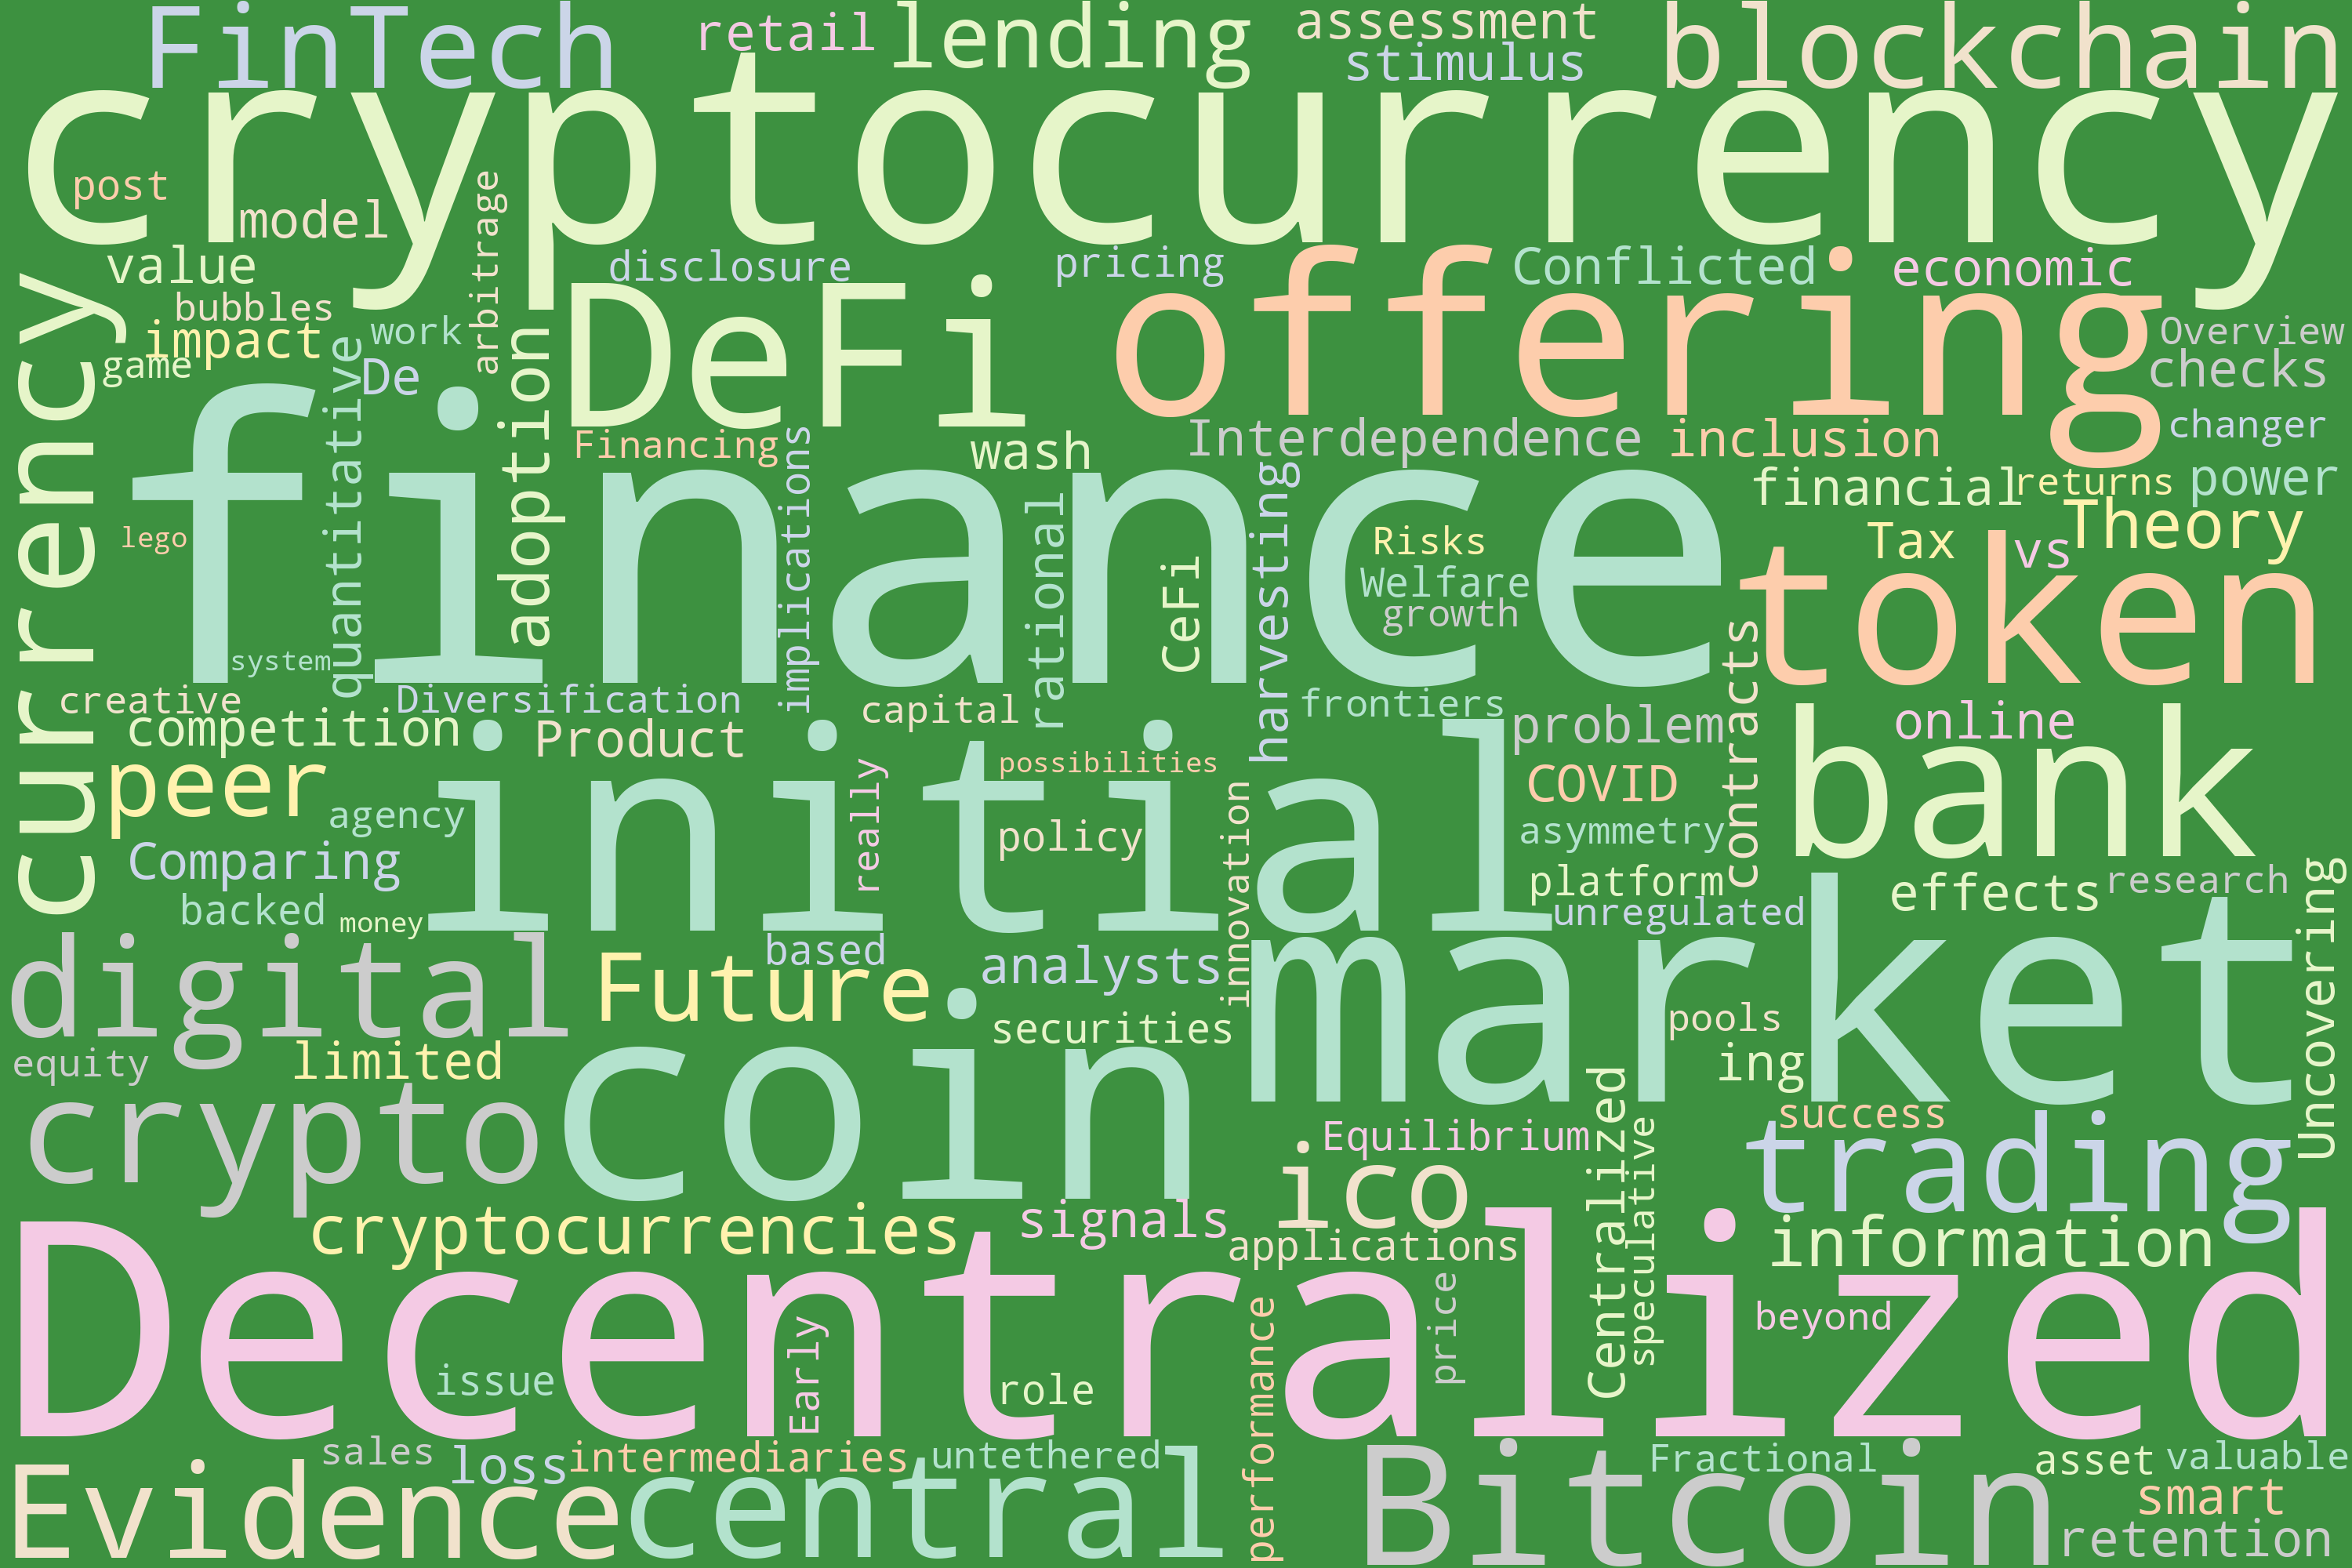

In [65]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

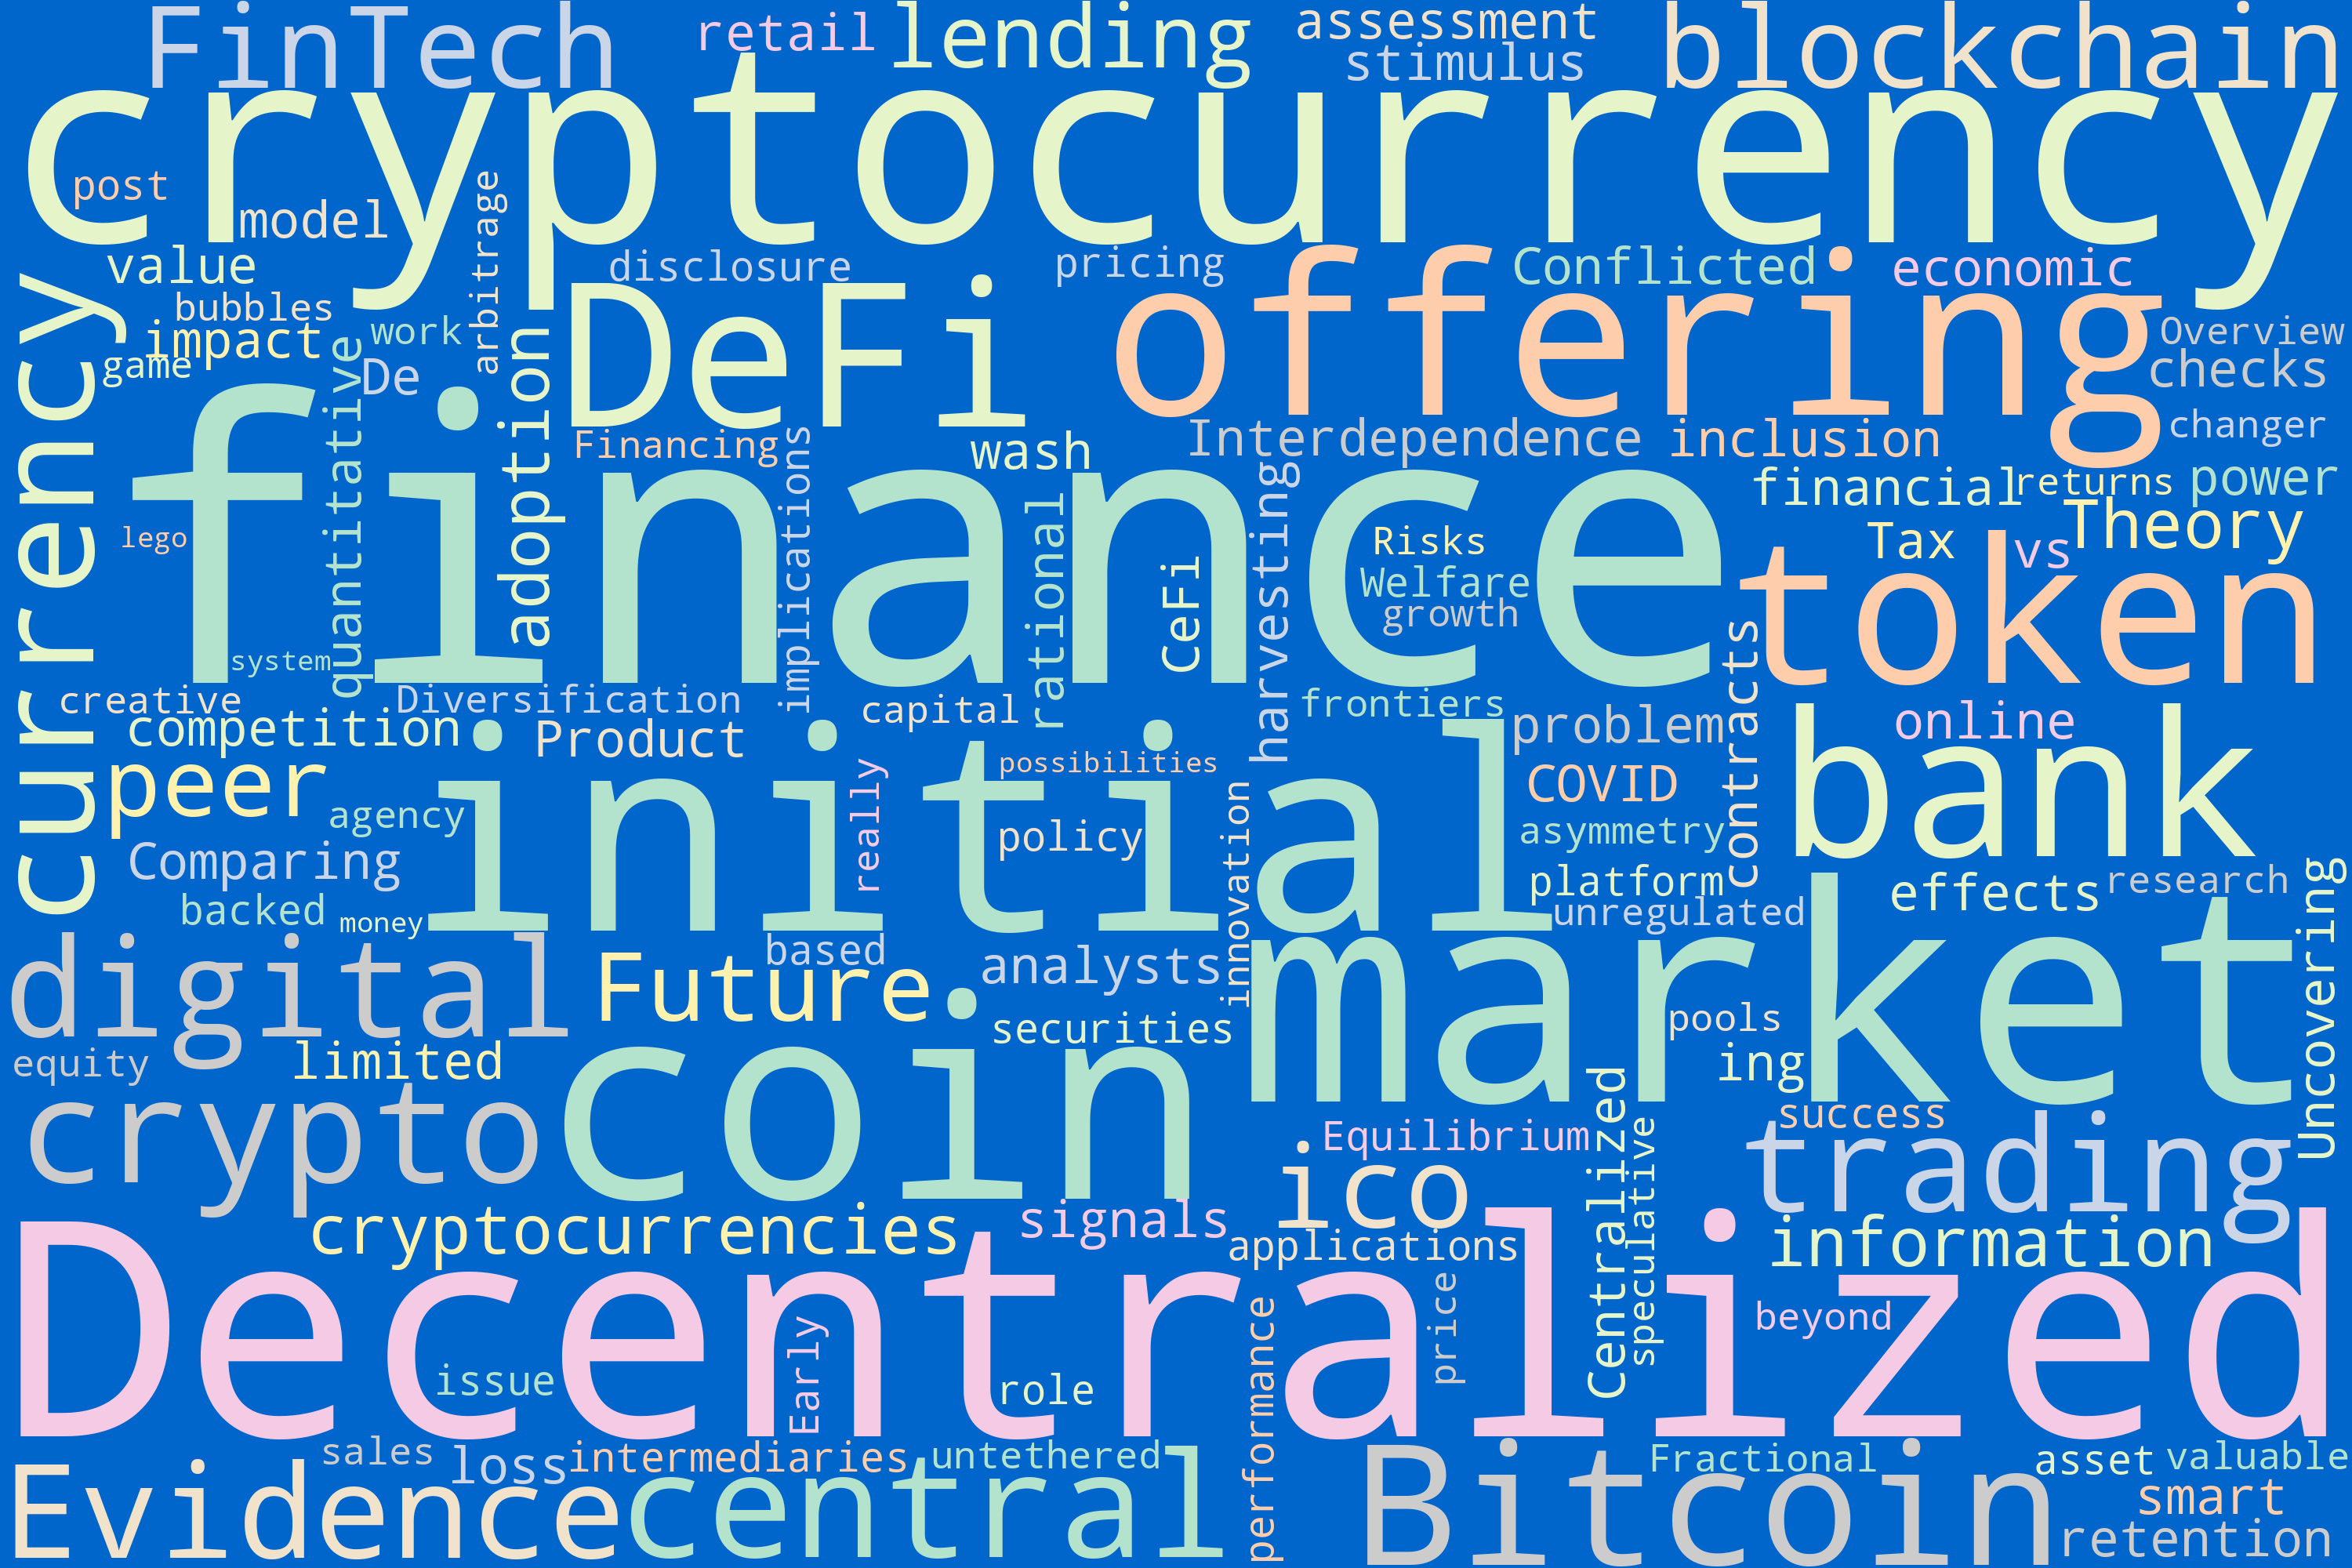

In [66]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2. Abstract

In [67]:
# Join the different processed titles together.
Abstract = ','.join(list(df['Abstract'].values))
Abstract

'Our legacy financial infrastructure has both limited growth opportunities and contributed to the inequality of opportunities. Around the world, 1.7 billion are unbanked. Small businesses, even those with a banking relationship, often must rely on high-cost financing, such as credit cards, because traditional banking excludes them from loan financing. High costs also impact retailers who lose 3% on every credit card sales transaction. These total costs for small businesses are enormous by any metric. The result is less investment and decreased economic growth. Decentralized finance, or DeFi, poses a challenge to the current system and offers a number of potential solutions to the problems inherent in the traditional financial infrastructure. While there are many fintech initiatives, we argue that the ones that embrace the current banking infrastructure are likely to be fleeting. We argue those initiatives that use decentralized methods - in particular blockchain technology - have the b

In [68]:
stop_words = stopwords.words('english')
stop_words.extend(['.'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

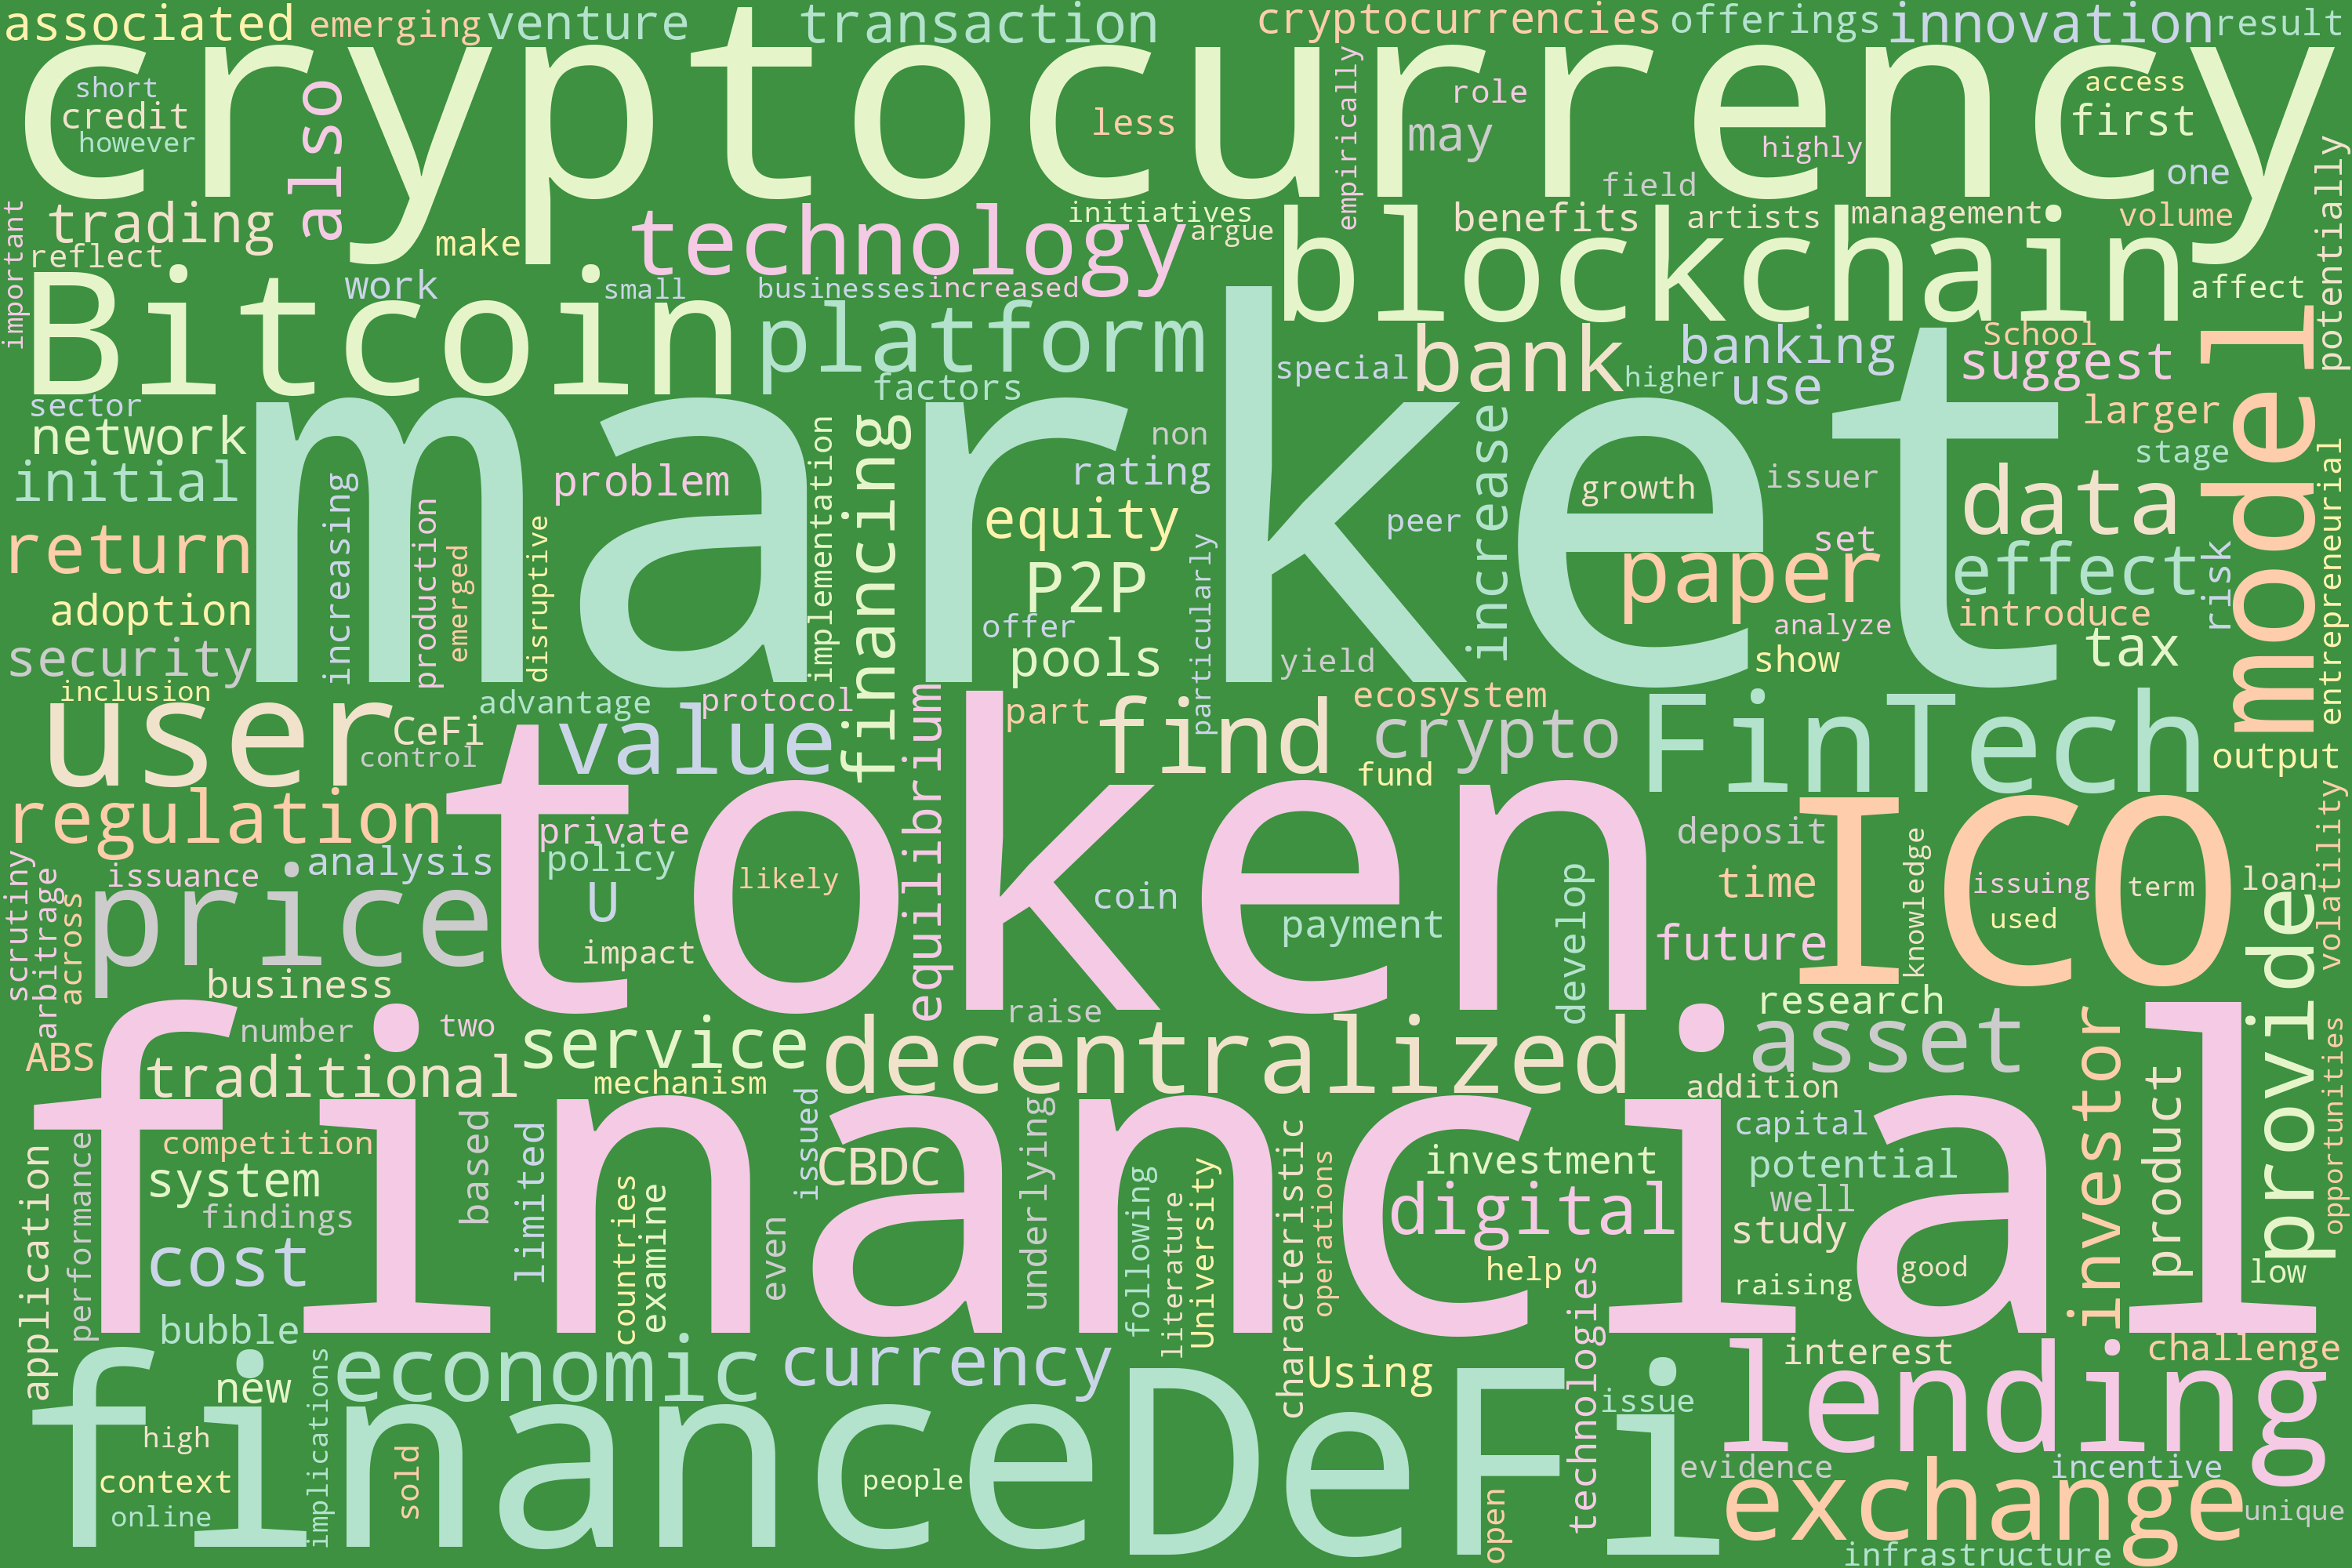

In [69]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

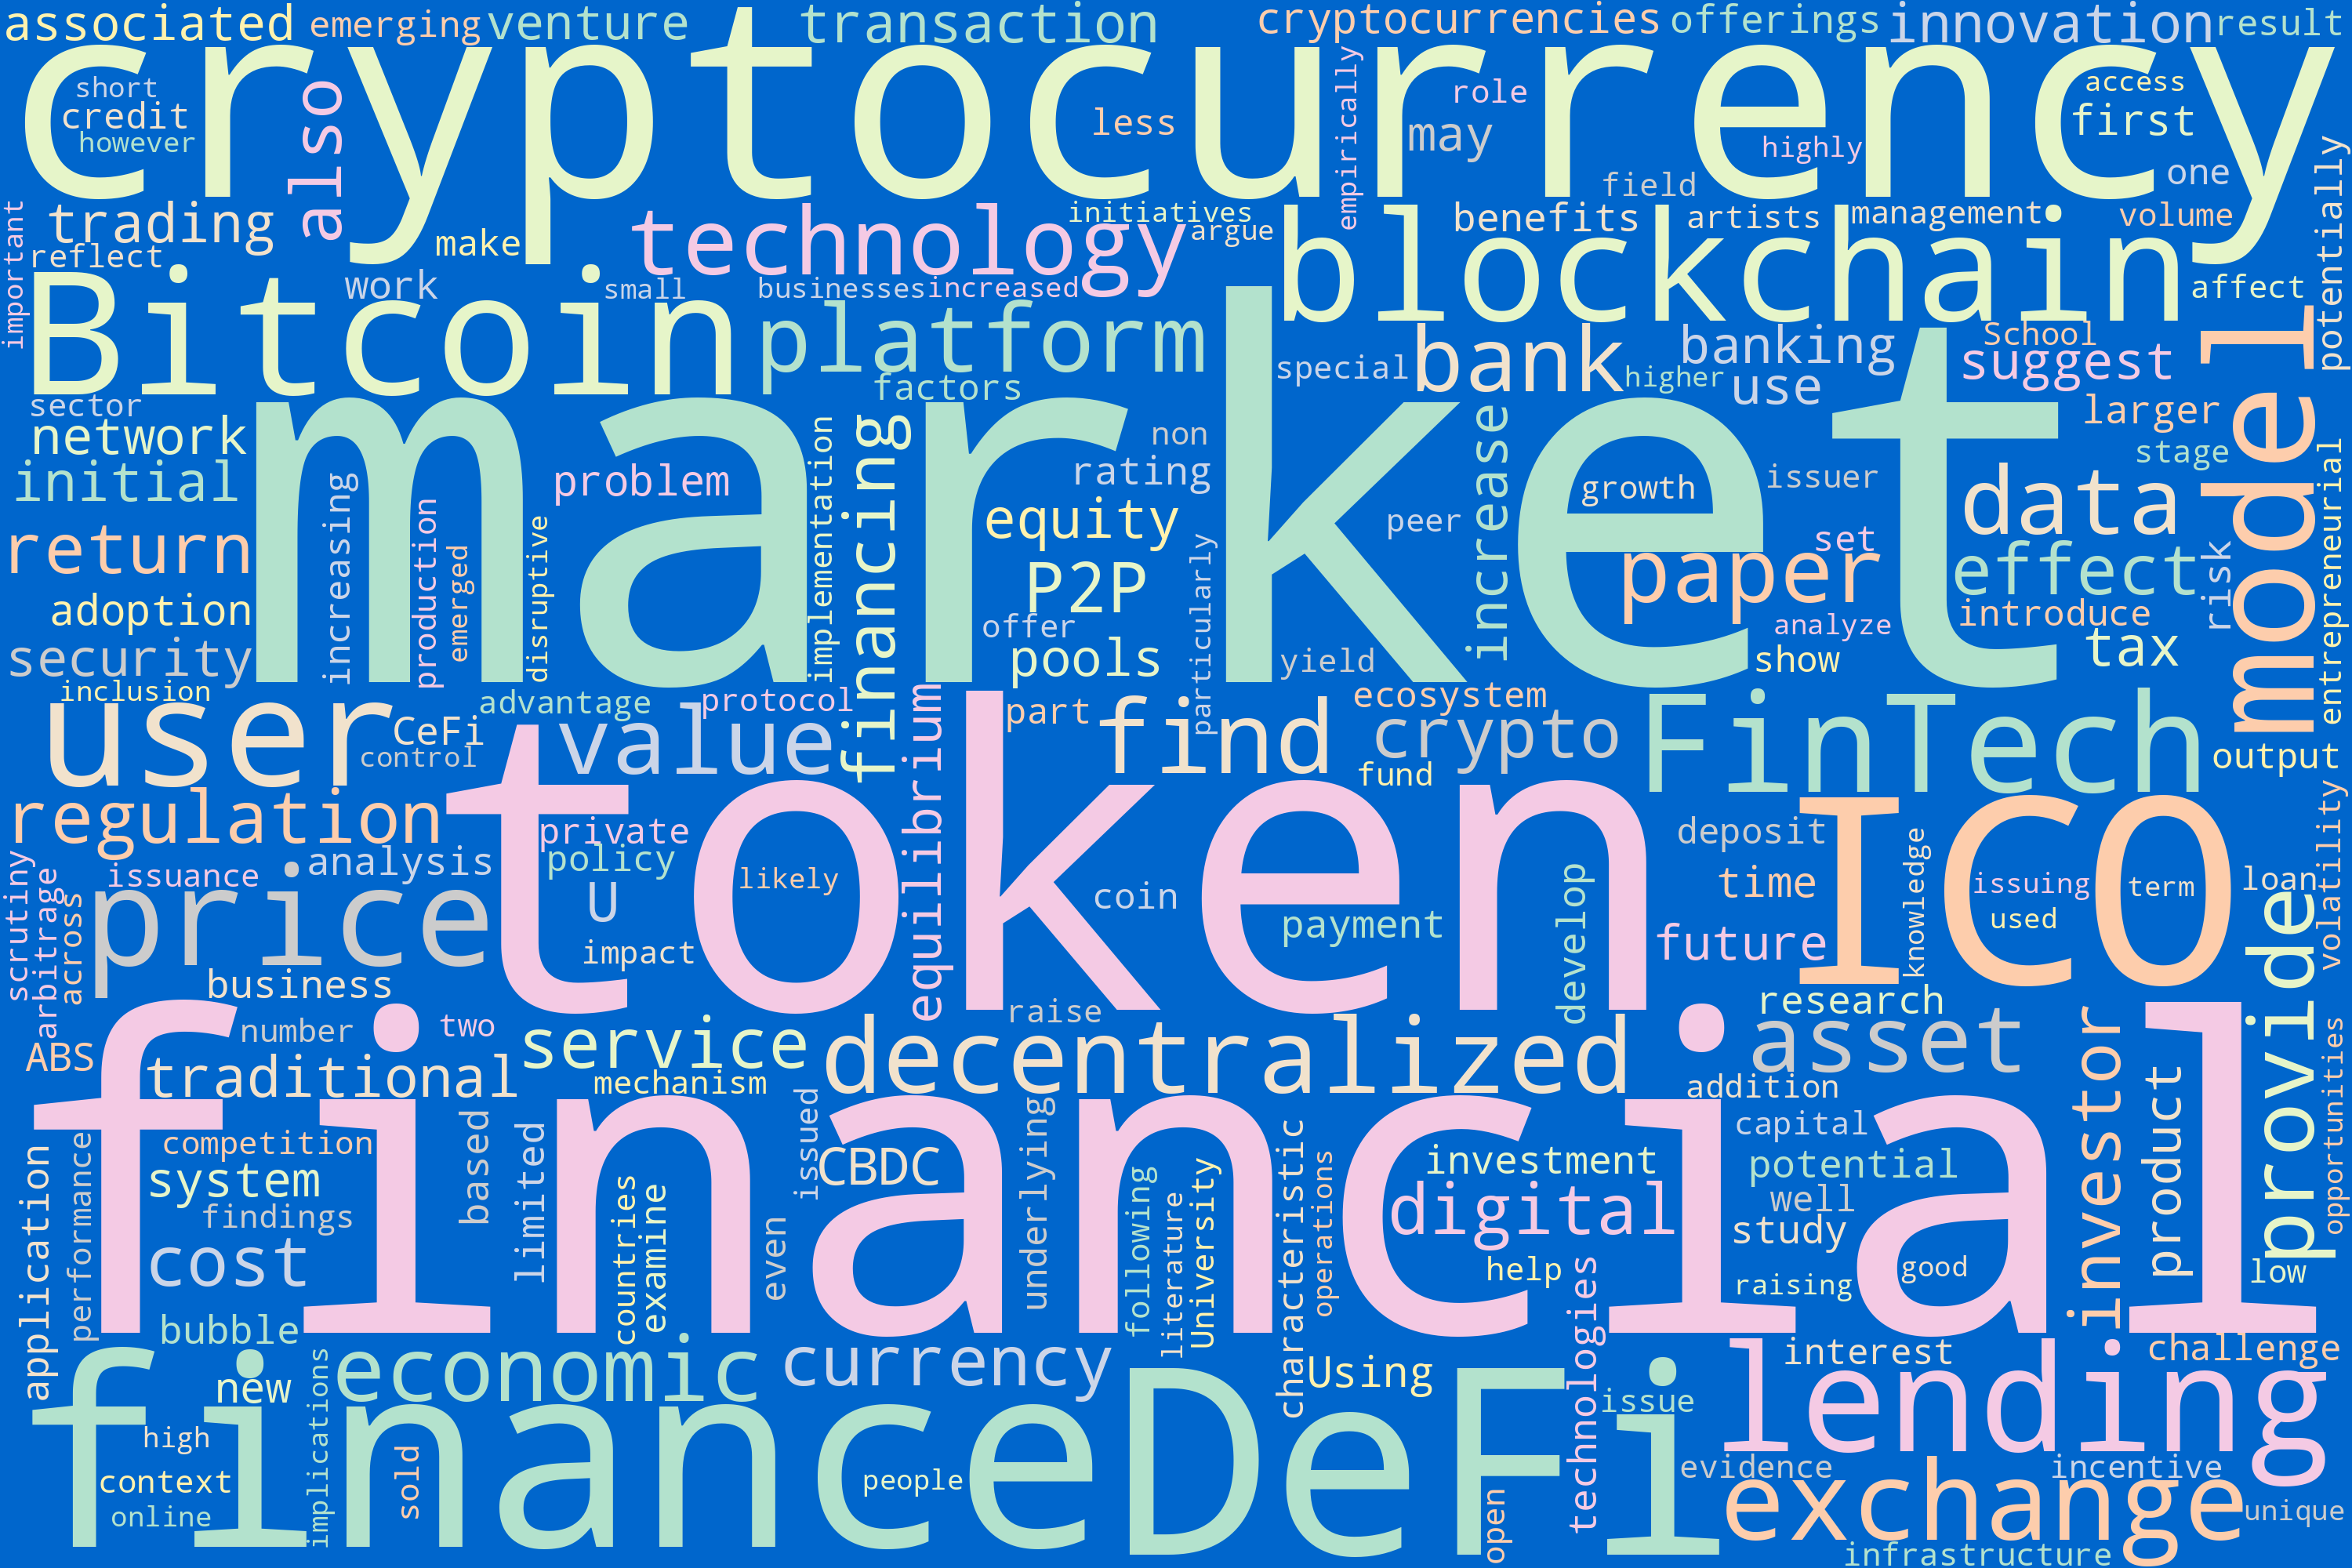

In [70]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part II Bigram

## 2.1. Title

In [71]:
df.columns

Index(['Item type', 'Authors', 'Title', 'Abstract', 'Journal',
       'Publication year', 'Volume', 'Issue', 'Pages', 'Institution',
       'Publisher', 'Proceedings title', 'Date published', 'Notes',
       'How published'],
      dtype='object')

In [72]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [73]:
df_Title  = df['Title'].str.lower()

In [74]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles

'defi and the future of finance  cefi vs  defi--comparing centralized to decentralized finance  product market competition with crypto tokens and smart contracts  interdependence between online peer-to-peer lending and cryptocurrency markets and its effects on financial inclusion  model of cryptocurrencies  bank market power and central bank digital currency  theory and quantitative assessment  conflicted analysts and initial coin offerings  crypto wash trading  tax-loss harvesting with cryptocurrencies  de-crypto-ing signals in initial coin offerings  evidence of rational token retention  bitcoin’s limited adoption problem  uncovering retail trading in bitcoin  the impact of covid-stimulus checks  the economic value of blockchain applications  early evidence from asset-backed securities  equilibrium bitcoin pricing  central bank digital currency  welfare and policy implications  should central banks issue digital currency   token-based platform finance  initial coin offering  ico  suc

In [75]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [76]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [77]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [78]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [79]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['defi',
 'and',
 'the',
 'future',
 'of',
 'finance',
 'cefi',
 'v',
 'defi--comparing',
 'centralized',
 'to',
 'decentralized',
 'finance',
 'product',
 'market',
 'competition',
 'with',
 'crypto',
 'token',
 'and',
 'smart',
 'contract',
 'interdependence',
 'between',
 'online',
 'peer-to-peer',
 'lending',
 'and',
 'cryptocurrency',
 'market',
 'and',
 'it',
 'effect',
 'on',
 'financial',
 'inclusion',
 'model',
 'of',
 'cryptocurrencies',
 'bank',
 'market',
 'power',
 'and',
 'central',
 'bank',
 'digital',
 'currency',
 'theory',
 'and',
 'quantitative',
 'assessment',
 'conflicted',
 'analyst',
 'and',
 'initial',
 'coin',
 'offering',
 'crypto',
 'wash',
 'trading',
 'tax-loss',
 'harvesting',
 'with',
 'cryptocurrencies',
 'de-crypto-ing',
 'signal',
 'in',
 'initial',
 'coin',
 'offering',
 'evidence',
 'of',
 'rational',
 'token',
 'retention',
 'bitcoin’s',
 'limited',
 'adoption',
 'problem',
 'uncovering',
 'retail',
 'trading',
 'in',
 'bitcoin',
 'the',
 'impact',


In [80]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok']]
words_nsw

['defi',
 'future',
 'finance',
 'cefi',
 'v',
 'defi--comparing',
 'centralized',
 'decentralized',
 'finance',
 'product',
 'market',
 'competition',
 'crypto',
 'token',
 'smart',
 'contract',
 'interdependence',
 'online',
 'peer-to-peer',
 'lending',
 'cryptocurrency',
 'market',
 'effect',
 'financial',
 'inclusion',
 'model',
 'cryptocurrencies',
 'bank',
 'market',
 'power',
 'central',
 'bank',
 'digital',
 'currency',
 'theory',
 'quantitative',
 'assessment',
 'conflicted',
 'analyst',
 'initial',
 'coin',
 'offering',
 'crypto',
 'wash',
 'trading',
 'tax-loss',
 'harvesting',
 'cryptocurrencies',
 'de-crypto-ing',
 'signal',
 'initial',
 'coin',
 'offering',
 'evidence',
 'rational',
 'token',
 'retention',
 'bitcoin’s',
 'limited',
 'adoption',
 'problem',
 'uncovering',
 'retail',
 'trading',
 'bitcoin',
 'impact',
 'covid-stimulus',
 'check',
 'economic',
 'value',
 'blockchain',
 'application',
 'early',
 'evidence',
 'asset-backed',
 'security',
 'equilibrium',
 'bitc

In [81]:
import collections

In [82]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [83]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(20)

bigram  counts
0    (decentralized, finance)       5
2            (coin, offering)       5
1             (initial, coin)       5
3             (central, bank)       3
4         (digital, currency)       3
5    (cryptocurrency, market)       2
6             (bank, digital)       2
7             (finance, defi)       2
74    (security, equilibrium)       1
65    (covid-stimulus, check)       1
73   (asset-backed, security)       1
72   (evidence, asset-backed)       1
71          (early, evidence)       1
70       (application, early)       1
69  (blockchain, application)       1
68        (value, blockchain)       1
67          (economic, value)       1
66          (check, economic)       1
61          (retail, trading)       1
64   (impact, covid-stimulus)       1

In [84]:
print(title_bigram.head(25).to_latex(index=False))

\begin{tabular}{lr}
\toprule
                   bigram &  counts \\
\midrule
 (decentralized, finance) &       5 \\
         (coin, offering) &       5 \\
          (initial, coin) &       5 \\
          (central, bank) &       3 \\
      (digital, currency) &       3 \\
 (cryptocurrency, market) &       2 \\
          (bank, digital) &       2 \\
          (finance, defi) &       2 \\
  (security, equilibrium) &       1 \\
  (covid-stimulus, check) &       1 \\
 (asset-backed, security) &       1 \\
 (evidence, asset-backed) &       1 \\
        (early, evidence) &       1 \\
     (application, early) &       1 \\
(blockchain, application) &       1 \\
      (value, blockchain) &       1 \\
        (economic, value) &       1 \\
        (check, economic) &       1 \\
        (retail, trading) &       1 \\
 (impact, covid-stimulus) &       1 \\
        (bitcoin, impact) &       1 \\
       (trading, bitcoin) &       1 \\
       (bitcoin, pricing) &       1 \\
     (uncovering, retail) 

<ipython-input-84-08f2aafd0111>:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [85]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                        |   counts |
|:------------------------------|---------:|
| ('decentralized', 'finance')  |        5 |
| ('coin', 'offering')          |        5 |
| ('initial', 'coin')           |        5 |
| ('central', 'bank')           |        3 |
| ('digital', 'currency')       |        3 |
| ('cryptocurrency', 'market')  |        2 |
| ('bank', 'digital')           |        2 |
| ('finance', 'defi')           |        2 |
| ('security', 'equilibrium')   |        1 |
| ('covid-stimulus', 'check')   |        1 |
| ('asset-backed', 'security')  |        1 |
| ('evidence', 'asset-backed')  |        1 |
| ('early', 'evidence')         |        1 |
| ('application', 'early')      |        1 |
| ('blockchain', 'application') |        1 |
| ('value', 'blockchain')       |        1 |
| ('economic', 'value')         |        1 |
| ('check', 'economic')         |        1 |
| ('retail', 'trading')         |        1 |
| ('impact', 'covid-stimulus')  |        1 |
| ('bitcoi

In [86]:
title_bigram.to_csv("title_bigram.csv")

In [87]:
import networkx as nx

In [88]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]

    G.add_edge(link[0], link[1], weight=count)

In [89]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [90]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]

    G.add_edge(link[0], link[1], weight=count)

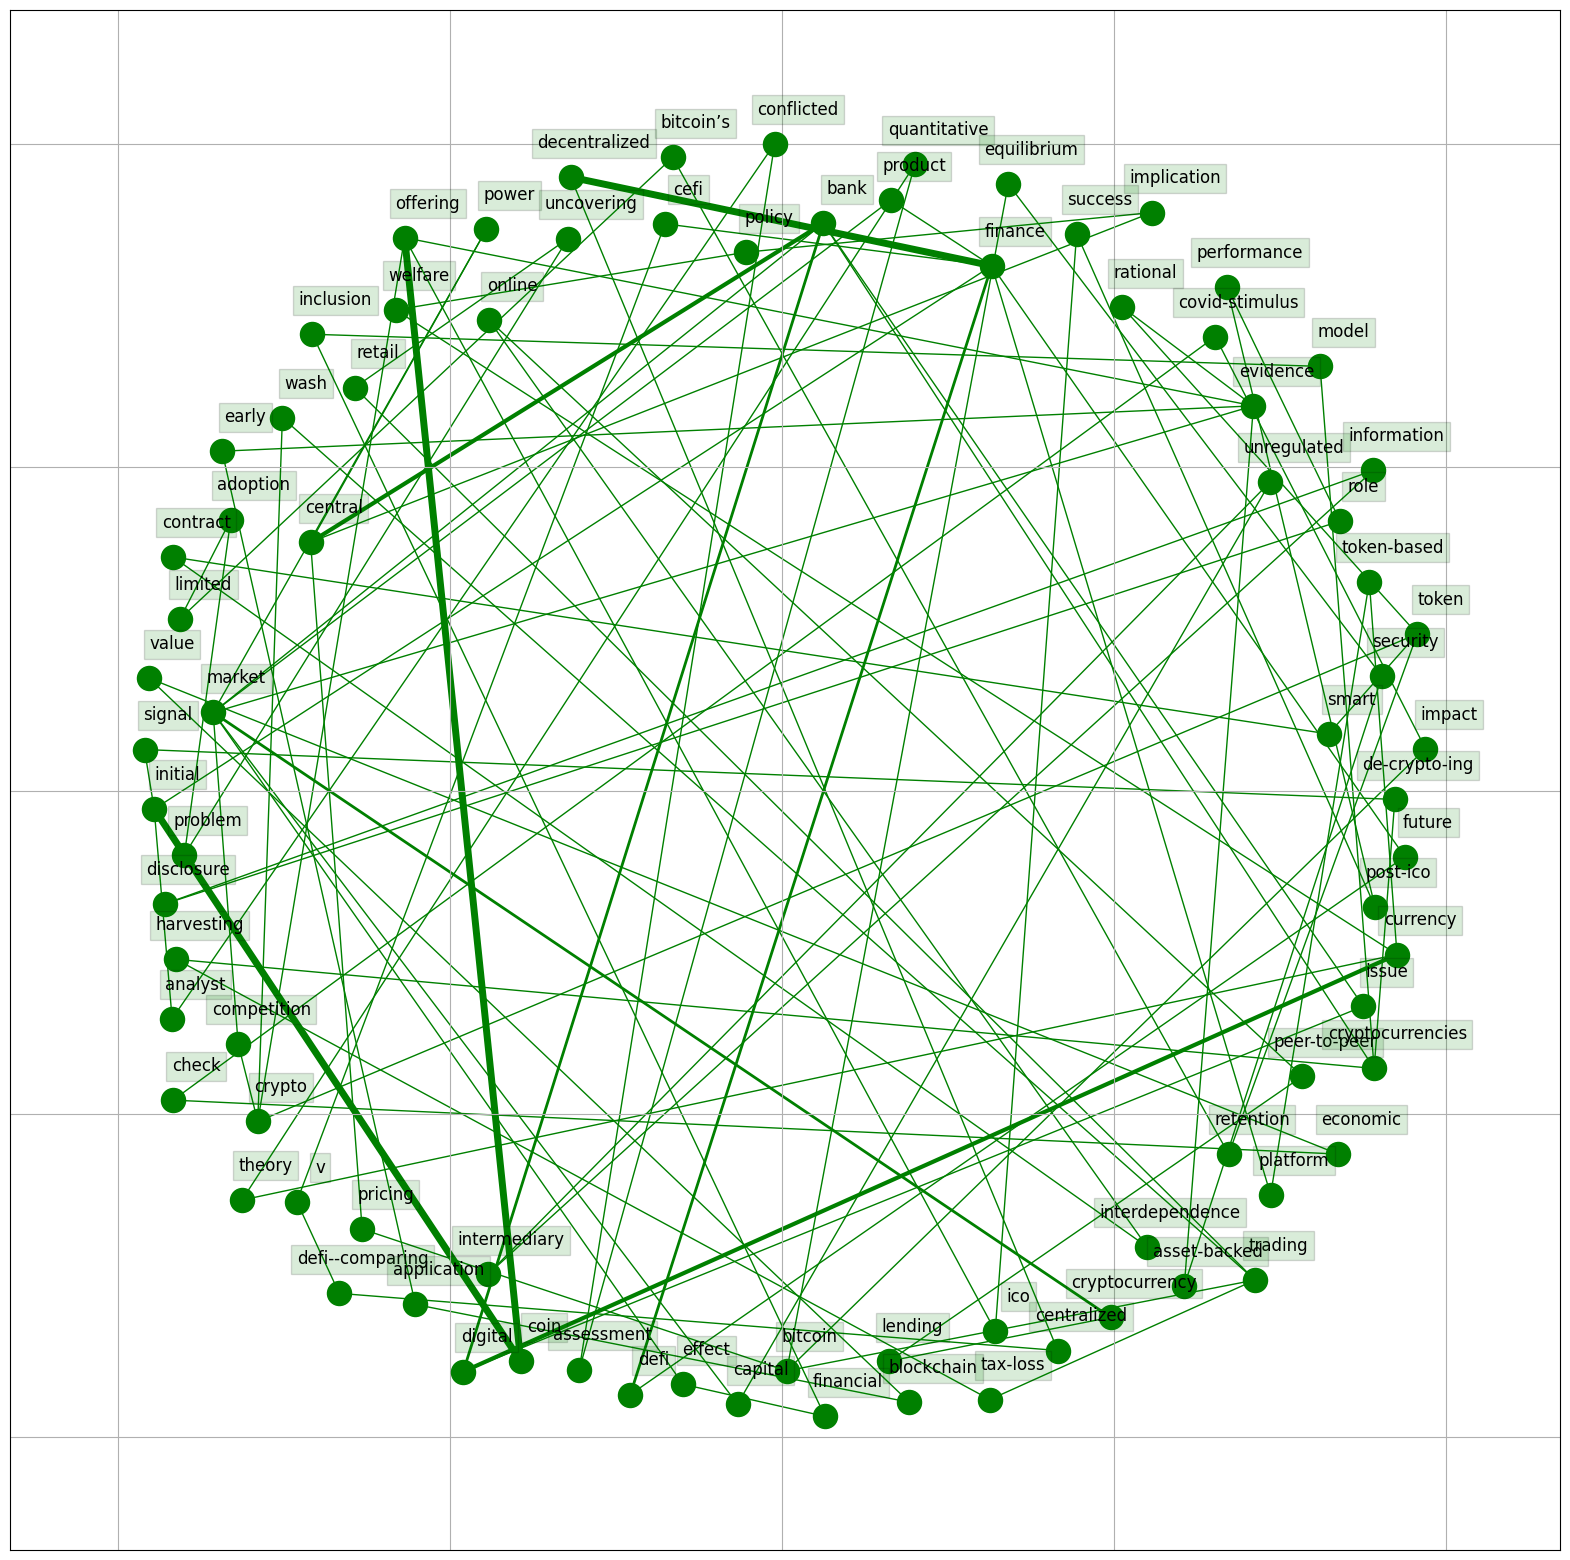

In [91]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [92]:
import igviz as ig

In [93]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [94]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-94-360256bff3c0>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.



## 2.2. Abstract

In [95]:
df_Abstract = df['Abstract'].str.lower()

In [96]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract

"our legacy financial infrastructure has both limited growth opportunities and contributed to the inequality of opportunities  around the world  billion are unbanked  small businesses  even those with banking relationship  often must rely on high-cost financing  such as credit cards  because traditional banking excludes them from loan financing  high costs also impact retailers who lose on every credit card sales transaction  these total costs for small businesses are enormous by any metric  the result is less investment and decreased economic growth  decentralized finance  or defi  poses challenge to the current system and offers number of potential solutions to the problems inherent in the traditional financial infrastructure  while there are many fintech initiatives  we argue that the ones that embrace the current banking infrastructure are likely to be fleeting  we argue those initiatives that use decentralized methods - in particular blockchain technology - have the best chance to

In [97]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [98]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [99]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [100]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['our',
 'legacy',
 'financial',
 'infrastructure',
 'ha',
 'both',
 'limited',
 'growth',
 'opportunity',
 'and',
 'contributed',
 'to',
 'the',
 'inequality',
 'of',
 'opportunity',
 'around',
 'the',
 'world',
 'billion',
 'are',
 'unbanked',
 'small',
 'business',
 'even',
 'those',
 'with',
 'banking',
 'relationship',
 'often',
 'must',
 'rely',
 'on',
 'high-cost',
 'financing',
 'such',
 'a',
 'credit',
 'card',
 'because',
 'traditional',
 'banking',
 'excludes',
 'them',
 'from',
 'loan',
 'financing',
 'high',
 'cost',
 'also',
 'impact',
 'retailer',
 'who',
 'lose',
 'on',
 'every',
 'credit',
 'card',
 'sale',
 'transaction',
 'these',
 'total',
 'cost',
 'for',
 'small',
 'business',
 'are',
 'enormous',
 'by',
 'any',
 'metric',
 'the',
 'result',
 'is',
 'le',
 'investment',
 'and',
 'decreased',
 'economic',
 'growth',
 'decentralized',
 'finance',
 'or',
 'defi',
 'pose',
 'challenge',
 'to',
 'the',
 'current',
 'system',
 'and',
 'offer',
 'number',
 'of',
 'potent

In [101]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','e','g','drb','ha']]
words_nsw

['legacy',
 'financial',
 'infrastructure',
 'limited',
 'growth',
 'opportunity',
 'contributed',
 'inequality',
 'opportunity',
 'around',
 'world',
 'billion',
 'unbanked',
 'small',
 'business',
 'even',
 'banking',
 'relationship',
 'often',
 'must',
 'rely',
 'high-cost',
 'financing',
 'credit',
 'card',
 'traditional',
 'banking',
 'excludes',
 'loan',
 'financing',
 'high',
 'cost',
 'also',
 'impact',
 'retailer',
 'lose',
 'every',
 'credit',
 'card',
 'sale',
 'transaction',
 'total',
 'cost',
 'small',
 'business',
 'enormous',
 'metric',
 'result',
 'le',
 'investment',
 'decreased',
 'economic',
 'growth',
 'decentralized',
 'finance',
 'defi',
 'pose',
 'challenge',
 'current',
 'system',
 'offer',
 'number',
 'potential',
 'solution',
 'problem',
 'inherent',
 'traditional',
 'financial',
 'infrastructure',
 'many',
 'fintech',
 'initiative',
 'argue',
 'one',
 'embrace',
 'current',
 'banking',
 'infrastructure',
 'likely',
 'fleeting',
 'argue',
 'initiative',
 'use'

In [102]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [103]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0   (cryptocurrency, market)      11
1   (decentralized, finance)       9
2             (p2p, lending)       8
3            (lending, pool)       8
4        (digital, currency)       7
5   (blockchain, technology)       6
6       (financial, service)       6
7   (traditional, financial)       5
8           (coin, offering)       5
11           (initial, coin)       4
12          (offering, icos)       4
13           (tax, scrutiny)       4
10               (data, set)       4
9               (cefi, defi)       4
26      (net, transactional)       3
38          (special, issue)       3
37            (value, chain)       3
36  (cryptocurrency, return)       3
35         (agency, problem)       3
33        (business, school)       3
32  (operating, performance)       3
31     (post-ico, operating)       3
30           (bank, deposit)       3
29           (mean, payment)       3
28   (cryptocurrency, price)       3

In [104]:
print(abstract_bigram.head(25).to_latex(index=False))

\begin{tabular}{lr}
\toprule
                  bigram &  counts \\
\midrule
(cryptocurrency, market) &      11 \\
(decentralized, finance) &       9 \\
          (p2p, lending) &       8 \\
         (lending, pool) &       8 \\
     (digital, currency) &       7 \\
(blockchain, technology) &       6 \\
    (financial, service) &       6 \\
(traditional, financial) &       5 \\
        (coin, offering) &       5 \\
         (initial, coin) &       4 \\
        (offering, icos) &       4 \\
         (tax, scrutiny) &       4 \\
             (data, set) &       4 \\
            (cefi, defi) &       4 \\
    (net, transactional) &       3 \\
        (special, issue) &       3 \\
          (value, chain) &       3 \\
(cryptocurrency, return) &       3 \\
       (agency, problem) &       3 \\
      (business, school) &       3 \\
(operating, performance) &       3 \\
   (post-ico, operating) &       3 \\
         (bank, deposit) &       3 \\
         (mean, payment) &       3 \\
 (cryptocurr

<ipython-input-104-d3321eaeb648>:1: FutureWarning:

In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.



In [105]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                       |   counts |
|:-----------------------------|---------:|
| ('cryptocurrency', 'market') |       11 |
| ('decentralized', 'finance') |        9 |
| ('p2p', 'lending')           |        8 |
| ('lending', 'pool')          |        8 |
| ('digital', 'currency')      |        7 |
| ('blockchain', 'technology') |        6 |
| ('financial', 'service')     |        6 |
| ('traditional', 'financial') |        5 |
| ('coin', 'offering')         |        5 |
| ('initial', 'coin')          |        4 |
| ('offering', 'icos')         |        4 |
| ('tax', 'scrutiny')          |        4 |
| ('data', 'set')              |        4 |
| ('cefi', 'defi')             |        4 |
| ('net', 'transactional')     |        3 |
| ('special', 'issue')         |        3 |
| ('value', 'chain')           |        3 |
| ('cryptocurrency', 'return') |        3 |
| ('agency', 'problem')        |        3 |
| ('business', 'school')       |        3 |
| ('operating', 'performance') |

In [106]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [107]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [108]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]

    G.add_edge(link[0], link[1], weight=count/10)

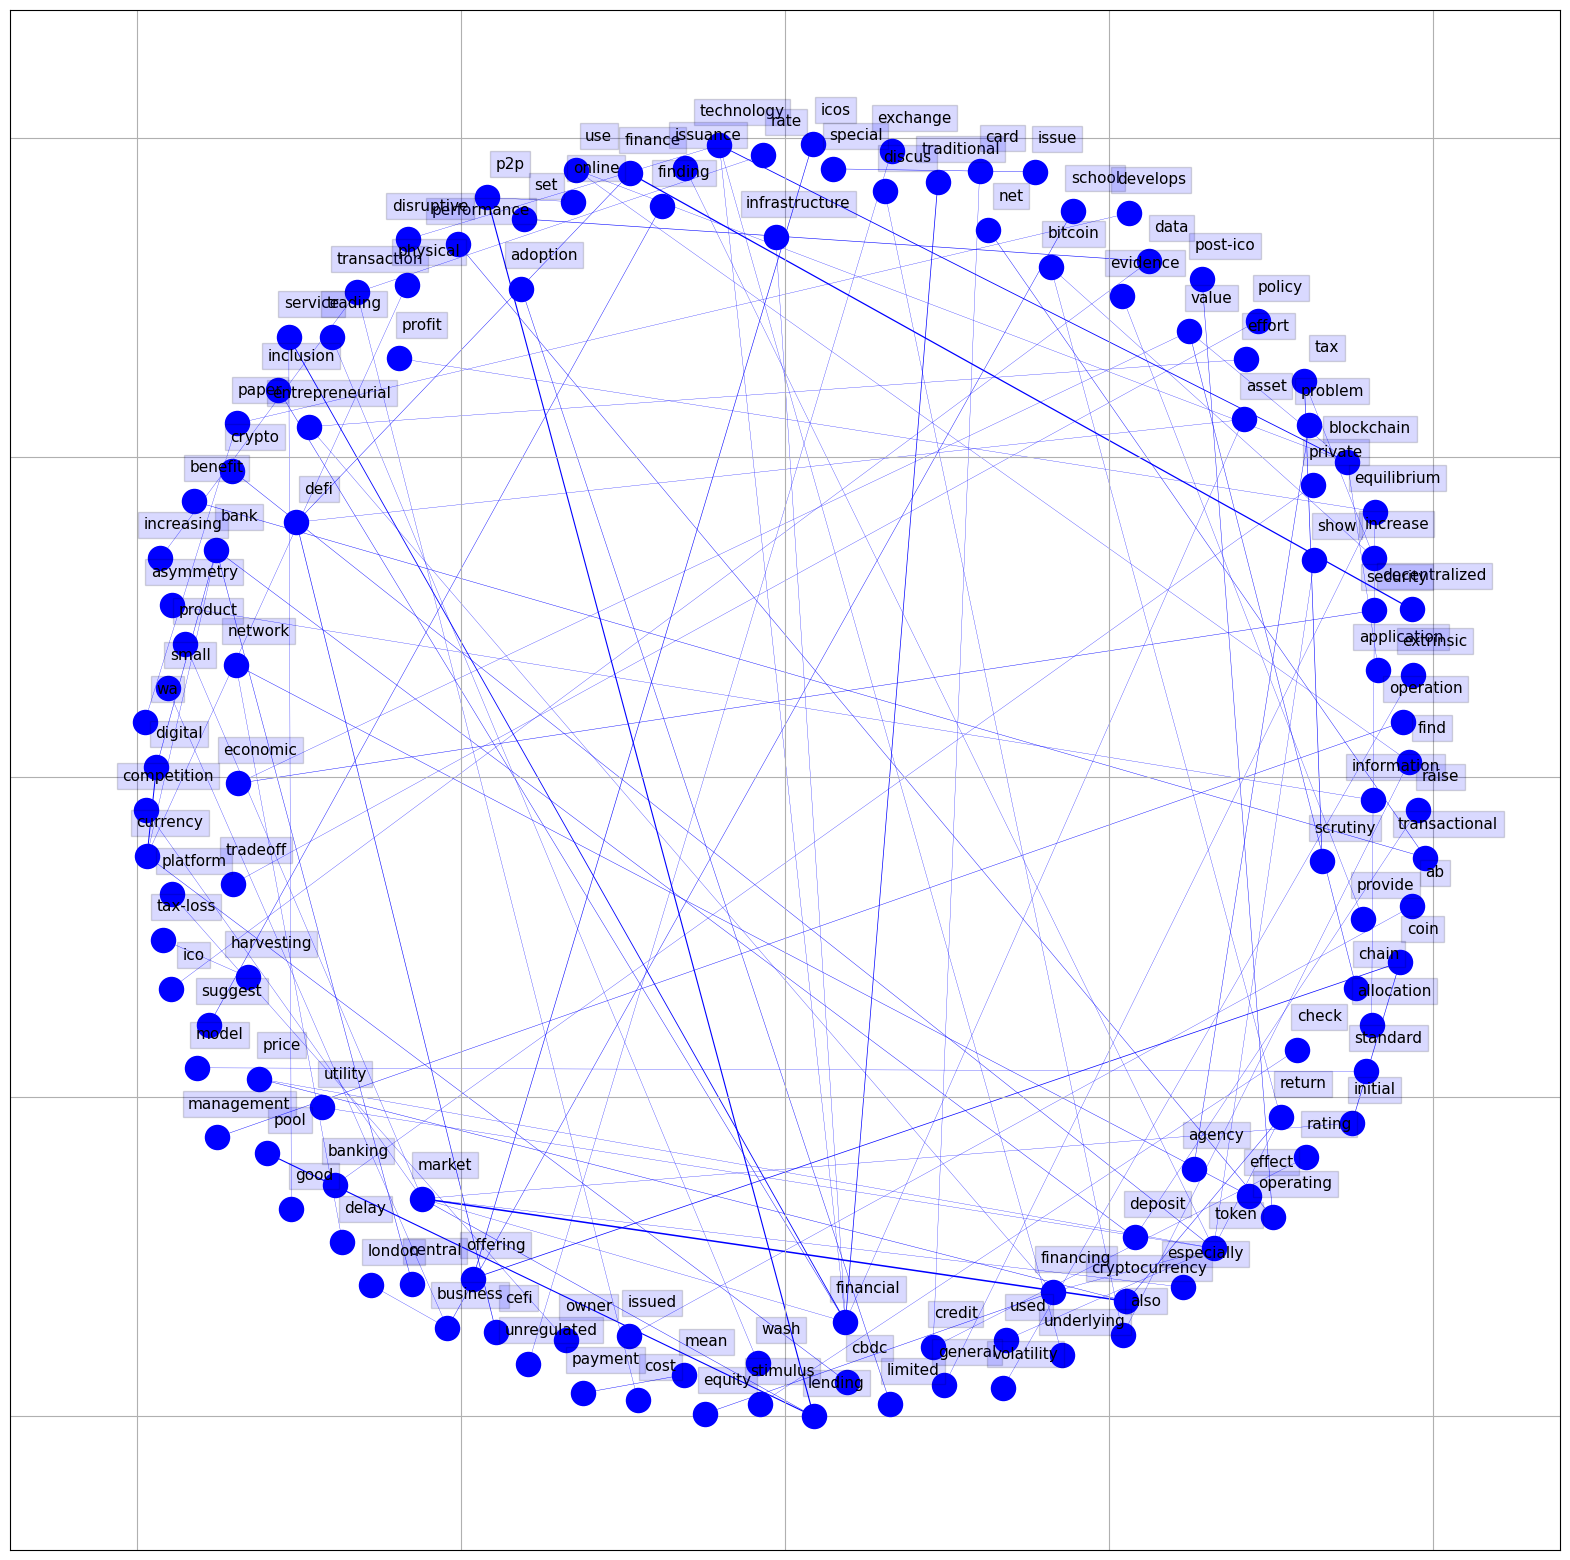

In [109]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)

plt.show()

In [110]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [111]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-111-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

